# python-pandas 数据分箱

## 导入模块

In [25]:
import pandas as pd 
import numpy as np
import matplotlib
import matplotlib.pyplot as plt

In [2]:
%matplotlib inline

## 简单案例

In [3]:
x = [0, 1, 1, 2, 3, 7]

In [4]:
# bins=3, 其余默认:
pd.cut(x, 3)

[(-0.007, 2.333], (-0.007, 2.333], (-0.007, 2.333], (-0.007, 2.333], (2.333, 4.667], (4.667, 7.0]]
Categories (3, interval[float64]): [(-0.007, 2.333] < (2.333, 4.667] < (4.667, 7.0]]

In [5]:
# bins=3, retbins=True: 
intervals, splits = pd.cut(x, 3, retbins=True)
print(intervals)
print("-"*20)
print(splits)

[(-0.007, 2.333], (-0.007, 2.333], (-0.007, 2.333], (-0.007, 2.333], (2.333, 4.667], (4.667, 7.0]]
Categories (3, interval[float64]): [(-0.007, 2.333] < (2.333, 4.667] < (4.667, 7.0]]
--------------------
[-0.007       2.33333333  4.66666667  7.        ]


In [6]:
pd.cut(x, 3, labels=["bad", "medium", "good"])

['bad', 'bad', 'bad', 'bad', 'medium', 'good']
Categories (3, object): ['bad' < 'medium' < 'good']

In [7]:
pd.cut(x, bins=4, labels=False)

array([0, 0, 0, 1, 1, 3], dtype=int64)

In [8]:
pd.cut(x, bins=3, duplicates='drop')

[(-0.007, 2.333], (-0.007, 2.333], (-0.007, 2.333], (-0.007, 2.333], (2.333, 4.667], (4.667, 7.0]]
Categories (3, interval[float64]): [(-0.007, 2.333] < (2.333, 4.667] < (4.667, 7.0]]

In [9]:
pd.cut(x, [-1, 2, 5, 8])

[(-1, 2], (-1, 2], (-1, 2], (-1, 2], (2, 5], (5, 8]]
Categories (3, interval[int64]): [(-1, 2] < (2, 5] < (5, 8]]

In [17]:
bins

IntervalIndex([(0, 1], (2, 3], (4, 5]],
              closed='right',
              dtype='interval[int64]')

In [16]:
bins = pd.IntervalIndex.from_tuples([(0, 1), (2, 3), (4, 5)])
pd.cut(x, bins=bins)

[NaN, (0.0, 1.0], (0.0, 1.0], NaN, (2.0, 3.0], NaN]
Categories (3, interval[int64]): [(0, 1] < (2, 3] < (4, 5]]

## 实战演练：每日个股涨跌幅分箱统计

+ 需求分析：给定每日N只股票的涨跌幅，按照一定的区间进行分箱，最后统计各区间内个股数量并按照“涨、跌、平”三种状态分色作图。

### 读入样本数据

In [23]:
df = pd.read_csv('./ret.csv')
df.head()
# df.info()

,stkcd,stknme,ret
0,000001.SZ,平安银行,0.043404
1,000002.SZ,万科A,0.033944
2,000004.SZ,国华网安,-0.022751
3,000005.SZ,ST星源,0.015504
4,000006.SZ,深振业A,0.010121


In [77]:
# 因为有平盘的股票，统计当日涨跌幅=0.0的个股数量简单查看
df[df['ret']==0.0].shape[0]

159

In [19]:
# 设计分箱序列
# 需要注意的是序列的首尾需要分别小于和大于数值序列的最小和最大值
bins = [-1, -0.07, -0.05, -0.02, -0.0000001, 0.00000001, 0.02, 0.05, 0.07, 1]

### 统计各区间内个股数量

In [63]:
s_ret_cut_count = pd.cut(df['ret'], bins=bins,
                         labels=False).value_counts().sort_index()
s_ret_cut_count

0      19
1      32
2     274
3    1113
4     159
5    2848
6     591
7     101
8     104
Name: ret, dtype: int64

### 设置横坐标轴标签

In [64]:
x_label_dict = {
    0: '(-100%, -7%]',
    1: '(-7%,-5%]',
    2: '(-5%,-2%]',
    3: '(-2%,0%]',
    4: '0%',
    5:  '(0%,2%]',
    6: '(2%,5%]',
    7: '(5%,7%]',
    8: '(7%, 100%)',
}

x_label = list(x_label_dict.values())

s_ret_cut_count.index = s_ret_cut_count.index.map(x_label_dict)

### 简单做图

<AxesSubplot:>

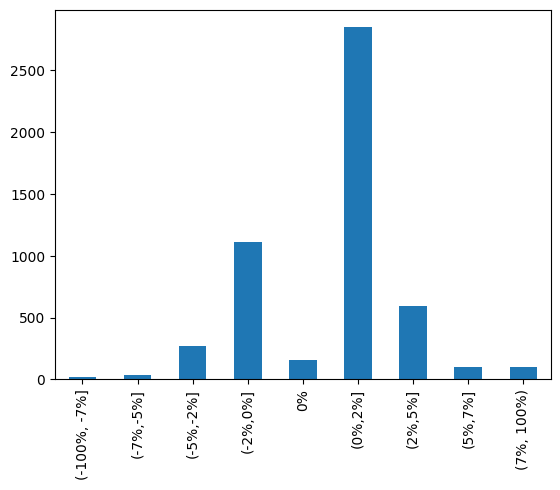

In [78]:
s_ret_cut_count.plot.bar()

### 复杂作图

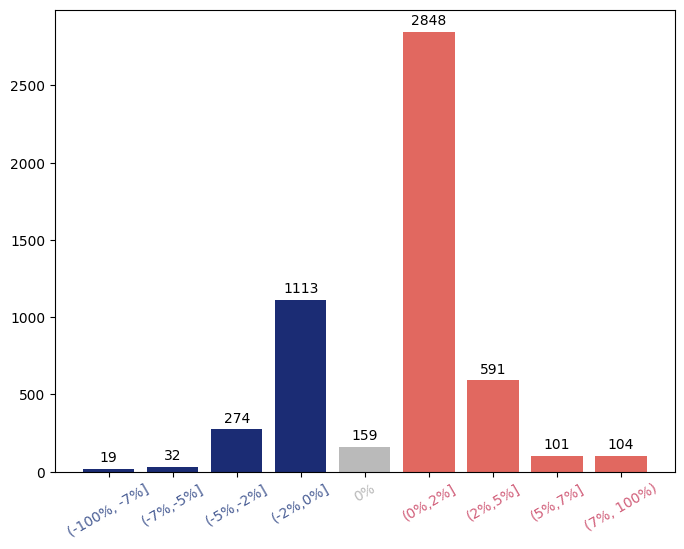

In [79]:
fig, ax = plt.subplots(figsize=(8, 6))

# 差异化配色
colors = ['#1B2C74'] * 4 + ['#BABABA'] + ['#E16860'] * 4

# 画图
rects = ax.bar(
    x=s_ret_cut_count.index, 
    height=s_ret_cut_count.values, 
    color=colors
)

# 增加柱标签
ax.bar_label(rects, padding=3)

# 坐标轴旋转30°
plt.xticks(rotation=30)

# 全局修改横坐标轴配色
# plt.tick_params(axis='x', colors='#4A5E95')

# 根据范围差异化横坐标轴配色
for i in range(9):
    if i <= 3:
        color = '#4A5E95'
    elif i >= 5:
        color = '#D15F7A'
    else:
        color = '#BABABA'
    ax.get_xticklabels()[i].set_color(color)
    
plt.show()
# plt.savefig('updown.png')